In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sb

In [7]:
height_weight_data = pd.read_csv("datasets/500_Person_Gender_Height_Weight_Index.csv")
height_weight_data.head(5)

,Gender,Height,Weight,Index
0,Male,174,96,4
1,Male,189,87,2
2,Female,185,110,4
3,Female,195,104,3
4,Male,149,61,3


In [8]:
# Drop a column name Index
height_weight_data.drop('Index', inplace = True, axis = 1)
height_weight_data.head(3)

,Gender,Height,Weight
0,Male,174,96
1,Male,189,87
2,Female,185,110


In [9]:
# Check Missing value in dataset
height_weight_data.isnull().sum()

# looks like there is no missing value in this datasets

Gender    0
Height    0
Weight    0
dtype: int64

In [12]:
# Min func gives you minimum value for a particualr column
min_height = height_weight_data["Height"].min()
min_weight = height_weight_data["Weight"].min()
min_height, min_weight

(140, 50)

In [13]:
# Max func gives you maximum value for a particualr column
max_height = height_weight_data["Height"].max()
max_weight = height_weight_data["Weight"].max()
max_height, max_weight

(199, 160)

In [14]:
sorted_weight = height_weight_data["Weight"].sort_values().reset_index(drop = True)
len(sorted_weight)

500

In [15]:
# Using this helper function we can calculate mean of a particular column, but the column must be in sorted
def mean(data):
    num_elements = len(data)
    _sum = data.sum()
    return _sum/num_elements

In [19]:
# Using this helper function we can calculate median of a particular column, but the column must be in sorted
def median(data):
    num_elements = len(data)
    if (num_elements % 2 == 0) :
        return (data[(num_elements/2)-1] + data[(num_elements/2)]) /2
    else:
        return (data[((num_elements+1)/2)])


In [17]:
# Using helper function
mean(sorted_weight)

106.0

In [22]:
# using pandas mean function
weight_mean = height_weight_data["Weight"].mean()
weight_mean

106.0

In [20]:
# Using helper function
median(height_weight_data["Weight"].sort_values().reset_index(drop = True))

106.0

In [21]:
# using pandas
height_weight_data["Weight"].median()

106.0

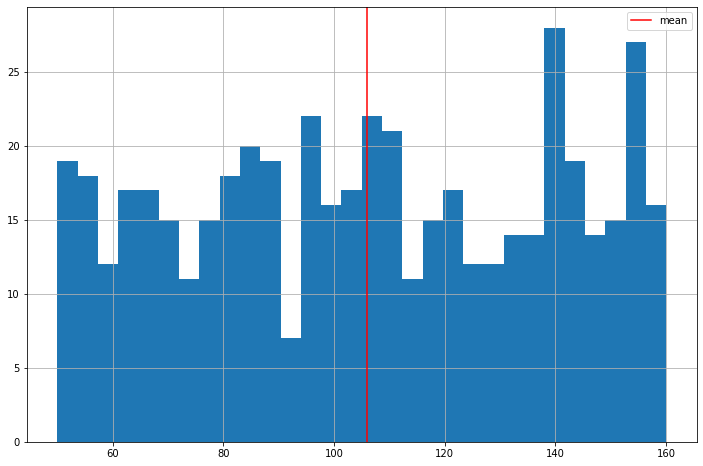

In [23]:
# Plot by using matplotlib for mean
plt.figure(figsize =(12,8))
height_weight_data["Weight"].hist(bins=30)
plt.axvline(weight_mean, color='r', label = 'mean')
plt.legend()

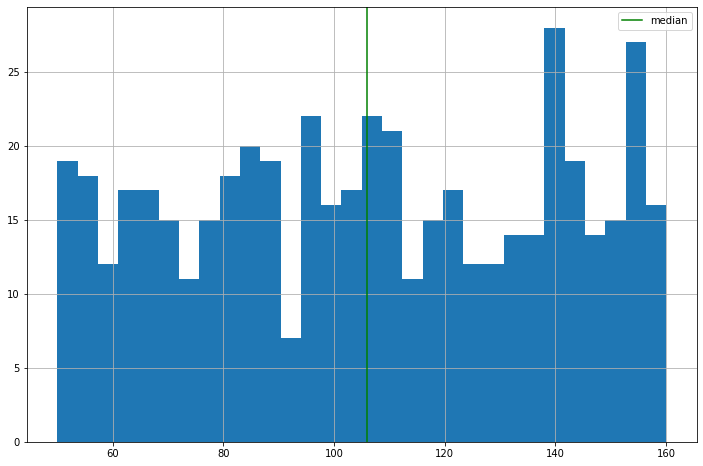

In [24]:
# Plot by using matplotlib for median
plt.figure(figsize =(12,8))
height_weight_data["Weight"].hist(bins=30)
plt.axvline(height_weight_data["Weight"].median(), color='g', label = 'median')
plt.legend()

In [25]:
# introduce some outliers and see whether median is better than mean or not
_data = [pd.Series(['Male', 205,460], index = height_weight_data.columns ),
        pd.Series(['Female', 202,390], index = height_weight_data.columns ),
        pd.Series(['Female', 199,410], index = height_weight_data.columns ),
        pd.Series(['Male', 202,390], index = height_weight_data.columns ),
        pd.Series(['Female', 199,410], index = height_weight_data.columns ),
        pd.Series(['Male', 201,460], index = height_weight_data.columns )
        ]

In [26]:
height_weight_updated =  height_weight_data.append(_data, ignore_index = True)
height_weight_updated.tail()

,Gender,Height,Weight
501,Female,202,390
502,Female,199,410
503,Male,202,390
504,Female,199,410
505,Male,201,460


In [29]:
# Check Mean
_mean = height_weight_updated["Weight"].mean()
_mean
# As you can see here the mean value is greater than previous mean value
# Mean is so sensitive for outliers

109.72332015810277

In [30]:
# Check Median
_median = height_weight_updated["Weight"].median()
_median

# As we see that previous median is 106.0, after adding outliers its not change that much.

106.5

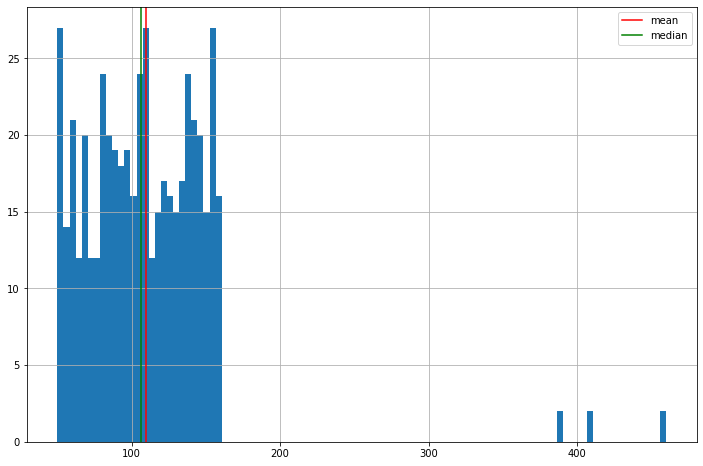

In [36]:
# Plot by using matplotlib for median
plt.figure(figsize =(12,8))
height_weight_updated["Weight"].hist(bins=100)
plt.axvline(_mean,color='r', label = 'mean')
plt.axvline(_median, color='g', label = 'median')
plt.legend()

In [37]:
# Mode
height_counts = {}

for p in height_weight_data["Height"]:
    if p not in height_counts:
        height_counts[p] = 1
    else:
        height_counts[p] += 1
height_counts

{174: 8,
 189: 5,
 185: 11,
 195: 10,
 149: 5,
 147: 7,
 154: 10,
 169: 10,
 159: 9,
 192: 6,
 155: 6,
 191: 7,
 153: 10,
 157: 10,
 140: 8,
 144: 5,
 172: 12,
 151: 8,
 190: 9,
 187: 14,
 163: 8,
 179: 14,
 178: 13,
 160: 7,
 197: 7,
 171: 8,
 175: 4,
 161: 9,
 182: 12,
 188: 15,
 181: 11,
 168: 13,
 176: 7,
 196: 6,
 164: 9,
 143: 3,
 141: 8,
 193: 5,
 194: 5,
 180: 8,
 165: 10,
 166: 9,
 186: 9,
 198: 5,
 145: 9,
 183: 11,
 177: 9,
 170: 6,
 142: 9,
 199: 3,
 150: 11,
 146: 9,
 148: 5,
 184: 12,
 158: 5,
 167: 9,
 156: 6,
 162: 9,
 173: 4,
 152: 8}

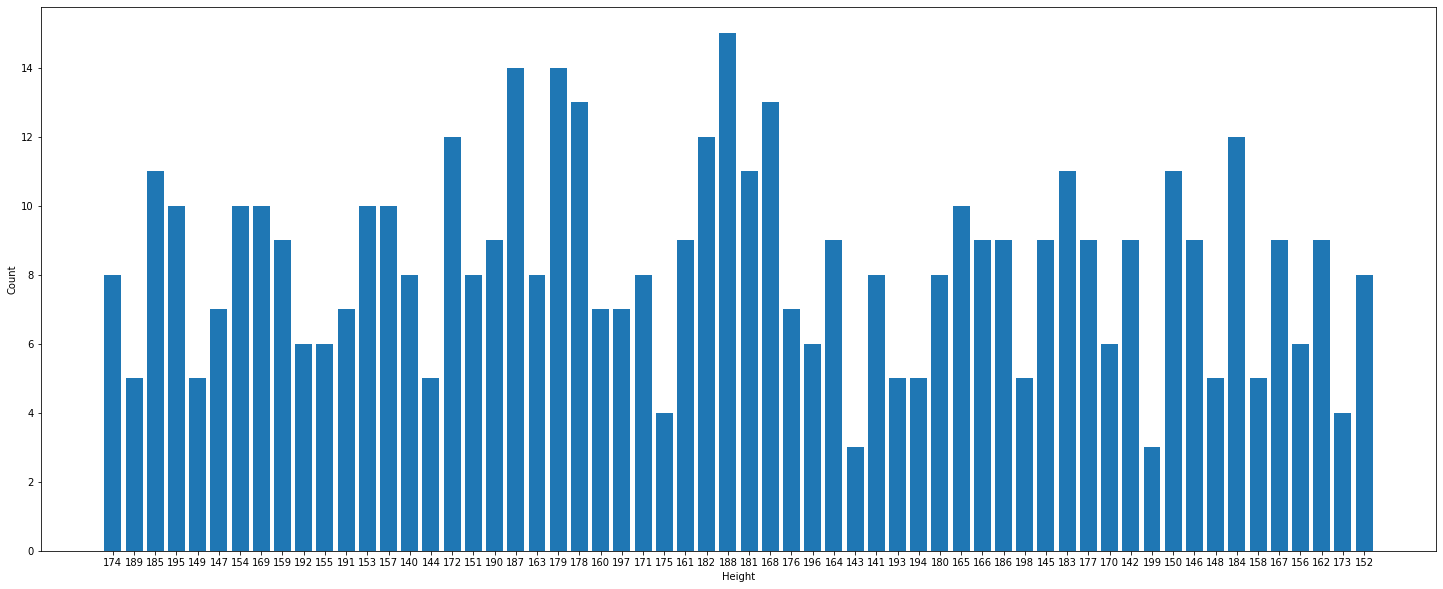

In [40]:
plt.figure(figsize=(25,10))
x_range = range(len(height_counts))
plt.bar(x_range, list(height_counts.values()), align = 'center')
plt.xticks(x_range, list(height_counts.keys()))
plt.xlabel('Height')
plt.ylabel("Count")
plt.show()